In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import sys

print(os.getcwd())

/content


In [3]:
!pip install mxnet
!pip install gluonnlp pandas tqdm
!pip install sentencepiece
!pip install transformers
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 19.1 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 KB 26.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp38-cp38-linux_x86_64.whl size=689005 sha256=5914b2fbd90e257de3491bb81aea2a49640a42a45240537b79dcc48732b888b1
  Stored in directory: /root/.cache/pip/wheels/b6/93/9d/2237550c409eb3ed725d6302b7897ddd9a037b40cef66dcd9c
Successfully built gluonnlp
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
#깃허브에서 KoBERT 파일 로드
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-wxyfc84t
  Running command git clone --filter=blob:none --quiet 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-wxyfc84t
  Resolved https://****@github.com/SKTBrain/KoBERT.git to commit 47a69af87928fc24e20f571fe10c3cc9dd9af9a3
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 KB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 110.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 877.9/881.9 MB 100.9 MB/s eta 0:00:01tcmalloc: large alloc 1102397440 bytes == 0x3a242000 @  0x7f8de1507680 0x7f8de1527da2 0x5f714c 0x64d800 0x527022 0x504

### Data Preparation and Training

In [5]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook

In [6]:
#kobert
from kobert.utils import get_tokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model

#transformers
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [7]:
#GPU 사용
device = torch.device("cuda")

In [8]:
from transformers import DistilBertModel

distilbert_model = DistilBertModel.from_pretrained('monologg/distilkobert')

Downloading:   0%|          | 0.00/441 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/114M [00:00<?, ?B/s]

Some weights of the model checkpoint at monologg/distilkobert were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [9]:
#BERT 모델, Vocabulary 불러오기
bertmodel, vocab = get_pytorch_kobert_model()

/content/.cache/kobert_v1.zip[██████████████████████████████████████████████████]
/content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece[██████████████████████████████████████████████████]


In [ ]:
# import pandas as pd
# data = pd.read_csv('/content/drive/MyDrive/한국어_단발성_대화_정리.csv')

In [ ]:
# data.loc[(data["Emotion"] == "행복"), "Emotion"] = 0
# data.loc[(data["Emotion"] == "중립"), "Emotion"] = 1
# data.loc[(data["Emotion"] == "분노"), "Emotion"] = 2
# data.loc[(data["Emotion"] == "슬픔"), "Emotion"] = 3
# data.loc[(data["Emotion"] == "불안"), "Emotion"] = 4

# data_list = []
# for q, label in zip(data['Sentence'], data['Emotion'])  :
#     data = []
#     data.append(q)
#     data.append(str(label))

#     data_list.append(data)

In [ ]:
# #train & test 데이터로 나누기
# from sklearn.model_selection import train_test_split
                                                         
# dataset_train, dataset_test = train_test_split(data_list, test_size=0.13, random_state=0)

In [10]:
import pandas as pd

dataset_train = pd.read_excel('/content/drive/MyDrive/train_data_1.xlsx', index_col=0)
dataset_test = pd.read_excel('/content/drive/MyDrive/test_data_1.xlsx', index_col=0)
dataset_val = pd.read_excel('/content/drive/MyDrive/valid_data_1.xlsx', index_col=0)

In [11]:
print(len(dataset_train))
print(len(dataset_test))
print(len(dataset_val))

7000
1500
1500


In [12]:
dataset_train

,document,label
2641,"안녕하세요 고1 여고생입니다,,,,",1
8065,그런데 상황이너무힘들다.,3
2559,사진 많이크나요..?,1
2673,아프리카 난민을 돕는 게 낫겠다.,1
284,사고나면 초대형사고로 이어질거같은데...특히 중국...,2
...,...,...
8060,야밤에혼자라면먹고있는데갑자기울음이빵하고터졌네요,3
3662,일부러 터칠 생각이었으면 케이스는 벗겼을 듯..,1
5253,참나.. 야메라니... 기가 막힌다..,4
7850,생긴것도 엄청 귀엽고 웃을때는 정말...,0


In [13]:
data_list_train, data_list_test, data_list_val = [], [], []

for q, label in zip(dataset_train['document'], dataset_train['label'])  :
    data = []
    data.append(q)
    data.append(str(label))

    data_list_train.append(data)

for q, label in zip(dataset_test['document'], dataset_test['label'])  :
    data = []
    data.append(q)
    data.append(str(label))

    data_list_test.append(data)

for q, label in zip(dataset_val['document'], dataset_val['label'])  :
    data = []
    data.append(q)
    data.append(str(label))

    data_list_val.append(data)

dataset_train = data_list_train
dataset_test = data_list_test
dataset_val = data_list_val

In [14]:
dataset_train

[['안녕하세요 고1 여고생입니다,,,,', '1'],
 ['그런데 상황이너무힘들다.', '3'],
 ['사진 많이크나요..?', '1'],
 [' 아프리카 난민을 돕는 게 낫겠다.', '1'],
 ['사고나면 초대형사고로 이어질거같은데...특히 중국...', '2'],
 ['꽃놀이패 진짜 재밌는데 ㅋㅋㅋ', '0'],
 ['위너가 빅뱅 자리 메꾸겟지...', '1'],
 ['내가꼽은 최고의선수 기도....', '1'],
 ['12일에 만납시다', '1'],
 ['분명 제가더 사랑하고 제가더잘해줬는데왜이렇게 보고싶은건지', '3'],
 ['하늘과 땅과 조상이  빚어낸 선녀 중에 선녀.............', '0'],
 ['오호호호 ! 내일 하는군욥!', '0'],
 ['제가 시끄럽다고 조용히좀 해달라는게 그렇게 잘못 입니까?', '4'],
 ['내 세금 돌리도..', '3'],
 ['언제나 웃는 모습과 먹방의 진수를 보여주어 감사합니다.', '0'],
 ['자기 화나고기분나쁠때는이도저도없이 막말하구요..', '4'],
 ['믿어봐도될까요?', '2'],
 ['사진이 이슬비가 맞나 한참보다 아래 기자이름써있는거보고 멘붕옴', '1'],
 ['오늘 우리 가족은 온천에 갔어요.', '1'],
 [' 앞으로 그리울거같고 회장님이 없는 빈자리는 너무나도 크게 느껴집니다...ㅜㅜ', '3'],
 ['흐앙 갑자기 궁금해져서 끄적여봅니다 ㅠㅠㅠㅠ', '2'],
 ['나의 멘토이자 우상 창정이형 화이팅~~~행복하세요~~~', '0'],
 ['아 진짜 사람 아프게 하는 쓰레기들다 뒤졌으면 좋겠다', '4'],
 ['어느날 갑자기 성자들이나 된 마냥 수십년을 넘게 행해지고 있던걸 자기만 모르다 이제서야 알게된걸 어느날 갑자기 일어난 사건마냥 보도하고 선동하는 것들보면 참 가관......',
  '2'],
 ['   보는 제가 속이 타들어가네요..ㅇㅅㅇ..', '2'],
 ['무도 진자 대단하다', '0'],
 ['저희집이 1층인데 . 들어오진않겟죠???0', '2'],
 ['

In [15]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))
        

    def __len__(self):  
        return (len(self.labels))

In [17]:
#Setting parameters
max_len = 64
batch_size = 32
warmup_ratio = 0.1
num_epochs = 5
max_grad_norm = 1
log_interval = 200
learning_rate =  1e-05

In [18]:
# 토큰화
tokenizer = get_tokenizer()

tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)
data_train = BERTDataset(dataset_train, 0, 1, tok, max_len, True, False)
data_test = BERTDataset(dataset_test, 0, 1, tok, max_len, True, False)
data_val = BERTDataset(dataset_val, 0, 1, tok, max_len, True, False)

using cached model. /content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [19]:
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=4)
val_dataloader = torch.utils.data.DataLoader(data_val, batch_size=batch_size, num_workers=4)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [20]:
#kobert 학습모델 만들기
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=5,   ##클래스 수 조정##
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        pooler = self.bert(input_ids = token_ids, attention_mask = attention_mask.float().to(token_ids.device))[0][:,0]
        # distilbert는 pooler를 return하지 않음. 따라서 last_hidden_state로 부터 직접 pooler를 추출함

        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [21]:
#BERT 모델 불러오기
model = BERTClassifier(distilbert_model,  dr_rate=0.5).to(device)

#optimizer와 schedule 설정
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

#정확도 측정을 위한 함수 정의
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc
    
# train_dataloader

In [22]:
best_acc=0.0
best_loss=99999999
ckpt_path="/content/drive/MyDrive/ckpt/" #your path
ckpt_name=ckpt_path+"saved_model_distilbert2.pt"

In [42]:
#kobert 모델 학습시키기

train_acc_list, train_loss_list = [], []
test_acc_list, test_loss_list = [], []
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length,segment_ids,label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        # segment_ids = segment_ids.long().to(device) ## DistillBERT는 token_type_ids(segment_ids)를 사용하지 않음.
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    train_acc_list.append(train_acc / (batch_id+1))
    train_loss_list.append(loss)
    
    model.eval()
    for batch_id, (token_ids, valid_length,segment_ids,label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        # segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        with torch.no_grad():
          out = model(token_ids, valid_length)
        test_loss=loss_fn(out,label)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {} test loss {}".format(e+1, test_acc / (batch_id+1),test_loss.data.cpu().numpy()))
    test_acc_list.append(test_acc / (batch_id+1))
    test_loss_list.append(test_loss)

    if test_acc>best_acc and test_loss.data.cpu().numpy()<best_loss:
        torch.save({'epoch':e+1,
                      'model_state_dict':model.state_dict(),
                      'optimizer_state_dict':optimizer.state_dict(),
                      'loss':test_loss.data.cpu().numpy()},
                    ckpt_name)
        best_loss=test_loss.data.cpu().numpy()
        bset_acc=test_acc

        print('current best model saved')

<ipython-input-42-8668565d63e8>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length,segment_ids,label) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/219 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


epoch 1 batch id 1 loss 0.8299251794815063 train acc 0.65625
epoch 1 batch id 201 loss 0.868940532207489 train acc 0.6825248756218906
epoch 1 train acc 0.6844082952815829


<ipython-input-42-8668565d63e8>:29: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length,segment_ids,label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/47 [00:00<?, ?it/s]

epoch 1 test acc 0.6509308510638298 test loss 1.2377387285232544


  0%|          | 0/219 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 0.8488433957099915 train acc 0.625
epoch 2 batch id 201 loss 0.7935790419578552 train acc 0.7044465174129353
epoch 2 train acc 0.7074296042617961


  0%|          | 0/47 [00:00<?, ?it/s]

epoch 2 test acc 0.6582446808510638 test loss 1.2388184070587158


  0%|          | 0/219 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.8695352673530579 train acc 0.65625
epoch 3 batch id 201 loss 0.796675980091095 train acc 0.7133084577114428
epoch 3 train acc 0.7157058599695586


  0%|          | 0/47 [00:00<?, ?it/s]

epoch 3 test acc 0.663563829787234 test loss 1.2342634201049805


  0%|          | 0/219 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.7577413320541382 train acc 0.71875
epoch 4 batch id 201 loss 0.7346532940864563 train acc 0.7182835820895522
epoch 4 train acc 0.719558599695586


  0%|          | 0/47 [00:00<?, ?it/s]

epoch 4 test acc 0.6661284194528876 test loss 1.2311347723007202


  0%|          | 0/219 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.783839225769043 train acc 0.6875
epoch 5 batch id 201 loss 0.8359187841415405 train acc 0.7195273631840796
epoch 5 train acc 0.7191305175038052


  0%|          | 0/47 [00:00<?, ?it/s]

epoch 5 test acc 0.6655585106382979 test loss 1.2355060577392578


In [49]:
train_loss_list_, test_loss_list_ = [], []

for a, b in zip(train_loss_list, test_loss_list):
  train_loss_list_.append(float(a))
  test_loss_list_.append(float(b))

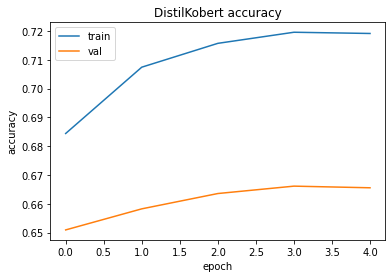

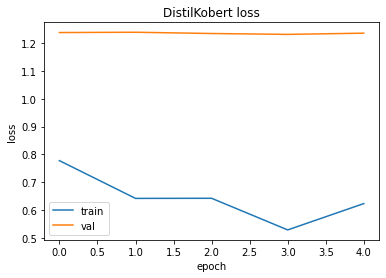

In [51]:
import matplotlib.pyplot as plt
plt.plot(train_acc_list)
plt.plot(test_acc_list)
plt.title('DistilKobert accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

plt.plot(train_loss_list_)
plt.plot(test_loss_list_)
plt.title('DistilKobert loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

### Inference

In [31]:
#새로운 문장 테스트
#토큰화
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

def predict(predict_sentence):

    data = [predict_sentence, '0']
    dataset_another = [data]

    another_test = BERTDataset(dataset_another, 0, 1, tok, max_len, True, False)
    test_dataloader = torch.utils.data.DataLoader(another_test, batch_size=batch_size, num_workers=5)
    
    model.eval()
    with torch.no_grad():

      for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
          token_ids = token_ids.long().to(device)
          # segment_ids = segment_ids.long().to(device)

          valid_length= valid_length
          label = label.long().to(device)

          # out = model(token_ids, valid_length, segment_ids)
          out = model(token_ids, valid_length)


          test_eval=[]
          for i in out:
              logits=i
              logits = logits.detach().cpu().numpy()

              if np.argmax(logits) == 0:
                  test_eval.append("행복이")
              elif np.argmax(logits) == 1:
                  test_eval.append("중립이")
              elif np.argmax(logits) == 2:
                  test_eval.append("분노가")
              elif np.argmax(logits) == 3:
                  test_eval.append("슬픔이")
              elif np.argmax(logits) == 4:
                  test_eval.append("불안이")

          print(">> 입력하신 내용에서 " + test_eval[0] + " 느껴집니다.")

using cached model. /content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [25]:
checkpoint=torch.load(ckpt_name)

In [26]:
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [32]:
#질문 무한반복하기! 0 입력시 종료
end = 1
while end == 1 :
    sentence = input("하고싶은 말을 입력해주세요 : ")
    if sentence == '0' :
        break
    predict(sentence)
    print("\n")

하고싶은 말을 입력해주세요 : 으 싫어


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


>> 입력하신 내용에서 불안이 느껴집니다.


하고싶은 말을 입력해주세요 : 와 멋있다
>> 입력하신 내용에서 행복이 느껴집니다.


하고싶은 말을 입력해주세요 : 왜 그런건데?
>> 입력하신 내용에서 분노가 느껴집니다.


하고싶은 말을 입력해주세요 : 개무섭다
>> 입력하신 내용에서 슬픔이 느껴집니다.


하고싶은 말을 입력해주세요 : 난 걔가 이해가 안돼
>> 입력하신 내용에서 분노가 느껴집니다.


하고싶은 말을 입력해주세요 : 0


In [36]:
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

model.eval()
output=[]
val_acc = 0
for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(val_dataloader)):
    token_ids = token_ids.long().to(device)
    # segment_ids = segment_ids.long().to(device)

    valid_length= valid_length
    label = label.long().to(device)

    out = model(token_ids, valid_length)
    val_loss=loss_fn(out,label)
    val_acc += calc_accuracy(out, label)

print("test acc {} test loss {}".format(val_acc / (batch_id+1),val_loss.data.cpu().numpy()))

    # for i in out:
    #     logits=i
    #     logits = logits.detach().cpu().numpy()
    #     output.append(logits)

using cached model. /content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


<ipython-input-36-e151dc9bfbdf>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(val_dataloader)):


  0%|          | 0/47 [00:00<?, ?it/s]

test acc 0.5963145896656535 test loss 1.0719064474105835
